In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
## divide in to dependent and independent features

x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [14]:
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
## feature Engineering
## one hot encoded
geography=pd.get_dummies(x['Geography'], drop_first=True)
gender=pd.get_dummies(x['Gender'], drop_first=True)

In [18]:
## concatenation of these variable with the dataframe
x=x.drop(['Geography','Gender'], axis=1)

In [19]:
x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
x=pd.concat([x,geography,gender], axis=1)

In [24]:
#splittin the dataset into traning set and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
x_test


array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
x_train.shape

(8000, 14)

In [29]:
# Now we create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [30]:
# lets intialize the ANN

classifier=Sequential()

In [31]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [32]:
#Adding the firts hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [33]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [34]:
#Adding the Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [35]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [44]:
#early stoping
import tensorflow as tf
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [45]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3186 - accuracy: 0.8675 - val_loss: 0.3652 - val_accuracy: 0.8497
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3173 - accuracy: 0.8692 - val_loss: 0.3637 - val_accuracy: 0.8501
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3184 - accuracy: 0.8692 - val_loss: 0.3664 - val_accuracy: 0.8501
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3178 - accuracy: 0.8716 - val_loss: 0.3660 - val_accuracy: 0.8493
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3183 - accuracy: 0.8705 - val_loss: 0.3667 - val_accuracy: 0.8501
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3186 - accuracy: 0.8690 - val_loss: 0.3712 - val_accuracy: 0.8474
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3173 - accuracy: 0.8709 - val_loss: 0.3683 - val_accuracy:

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

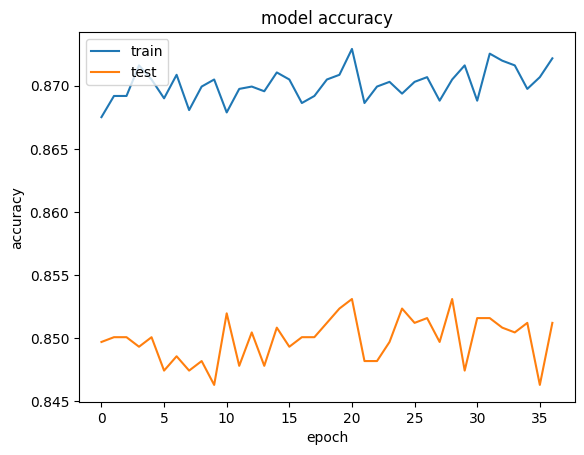

In [47]:
#summarise histroy for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

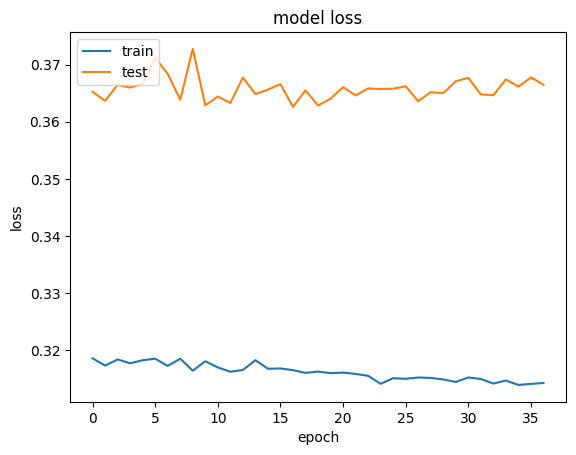

In [48]:
#summarise histroy for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show

In [49]:
#part 3 - making the prediction and evaluating the model

#predicting the Test set Results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)


63/63 [==============================] - 0s 2ms/step


In [51]:
#make the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1499,   96],
       [ 199,  206]])

In [52]:
#calculate the accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [53]:
score


0.8525

In [54]:
# get the weights
classifier.get_weights()

[array([[-0.20592445, -0.01865714,  0.04209758, -0.34881076, -0.28475317,
          0.2816286 ,  0.04258328,  0.28442377, -0.04106238,  0.15773396,
          0.47732154],
        [-0.8056248 ,  0.12108926,  0.17913672, -0.4909388 ,  0.47602147,
         -0.88693047, -0.35316673, -0.89895624, -0.93411297, -0.02374357,
          1.0245994 ],
        [ 0.03988934,  0.04475096,  0.10704472, -0.22425403,  0.3615544 ,
         -0.08076487, -0.01522621,  0.03491862,  0.18730627, -0.0025031 ,
         -0.11321414],
        [ 0.09840675,  0.507385  , -0.05420687, -0.09411148,  0.38674784,
          0.11822454,  0.2915412 , -0.2909567 ,  0.13191392, -0.45484307,
         -0.33384317],
        [ 0.57688624,  1.2281873 ,  0.694453  ,  0.25409704,  0.18164039,
         -0.01030858,  0.46517518,  0.311399  ,  0.02295708, -0.804146  ,
          0.81819326],
        [-0.0884503 , -0.10626034,  0.7882758 , -0.34465554, -0.20960437,
         -0.05388393,  0.50011086, -0.16212094,  0.07780677, -0.1939212